# 01_EDA_and_preprocessing.ipynb
## Exploratory Data Analysis and Preprocessing for Heart Disease Prediction

In [1]:
# 1. install kaggle package
!pip install kaggle

# 2. move kaggle.json (upload via Colab UI or mount from Drive)
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/   # ✅ هنا أضفنا المسار الجديد
!chmod 600 ~/.kaggle/kaggle.json

# 3. Download dataset (use the dataset slug)
!kaggle datasets download -d rishidamarla/heart-disease-prediction


Dataset URL: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
License(s): CC0-1.0
  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 12.7MB/s]


In [2]:
# 4. Unzip the downloaded file into a dataset folder
!unzip /content/heart-disease-prediction.zip -d /content/dataset


Archive:  /content/heart-disease-prediction.zip
  inflating: /content/dataset/Heart_Disease_Prediction.csv  


In [3]:
!pip install -q kaggle matplotlib seaborn scikit-learn tensorflow keras joblib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

In [6]:
import pandas as pd
data = pd.read_csv("/content/dataset/Heart_Disease_Prediction.csv")
print("✅ Dataset loaded successfully!\n")
print("Shape:", data.shape)
print("\nColumns and Data Types:\n", data.dtypes)
data.head()

✅ Dataset loaded successfully!

Shape: (270, 14)

Columns and Data Types:
 Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
print("\nMissing values per column:\n", data.isnull().sum())

num_cols = data.select_dtypes(include=['int64','float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns.drop('Heart Disease')

# Handle missing values
data[num_cols] = data[num_cols].fillna(data[num_cols].median())
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


Missing values per column:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [ ]:
print("\nStatistical Summary:\n", data.describe())
print("\nMedian values:\n", data.median())

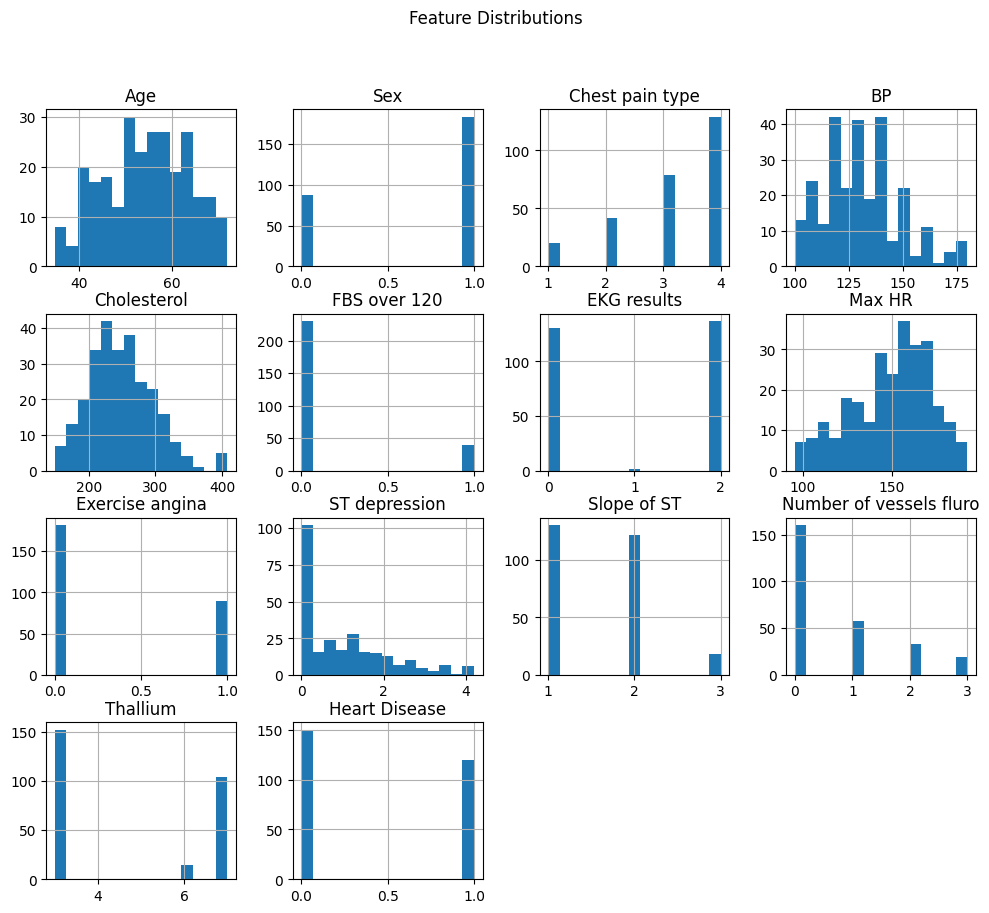

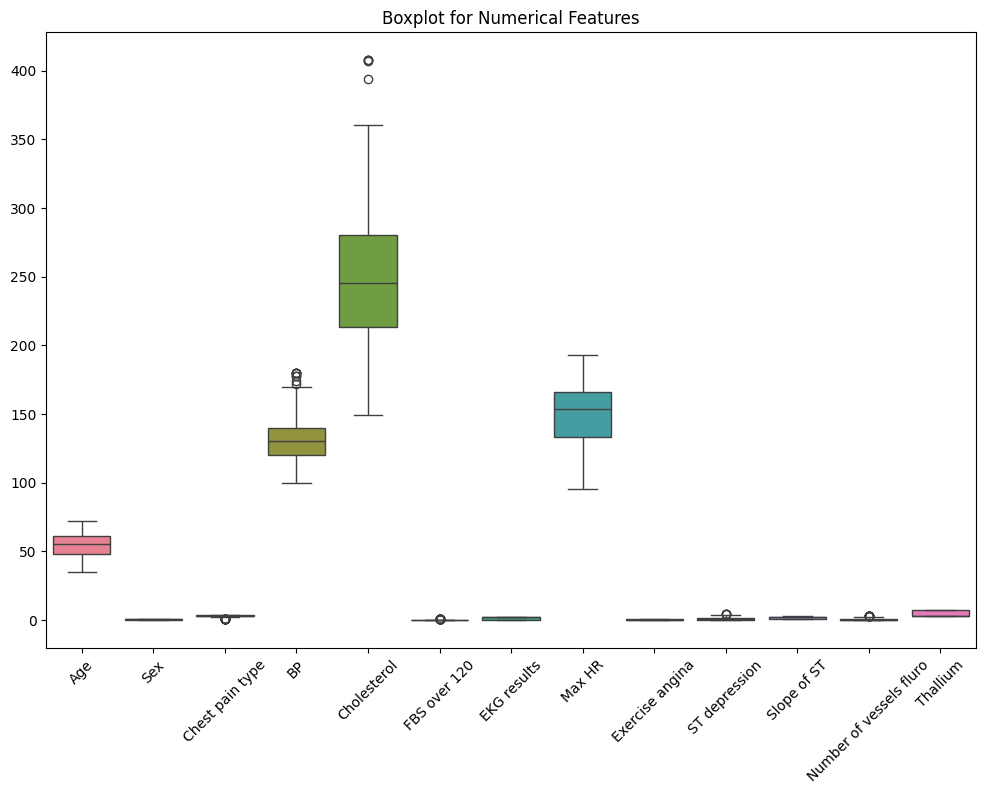

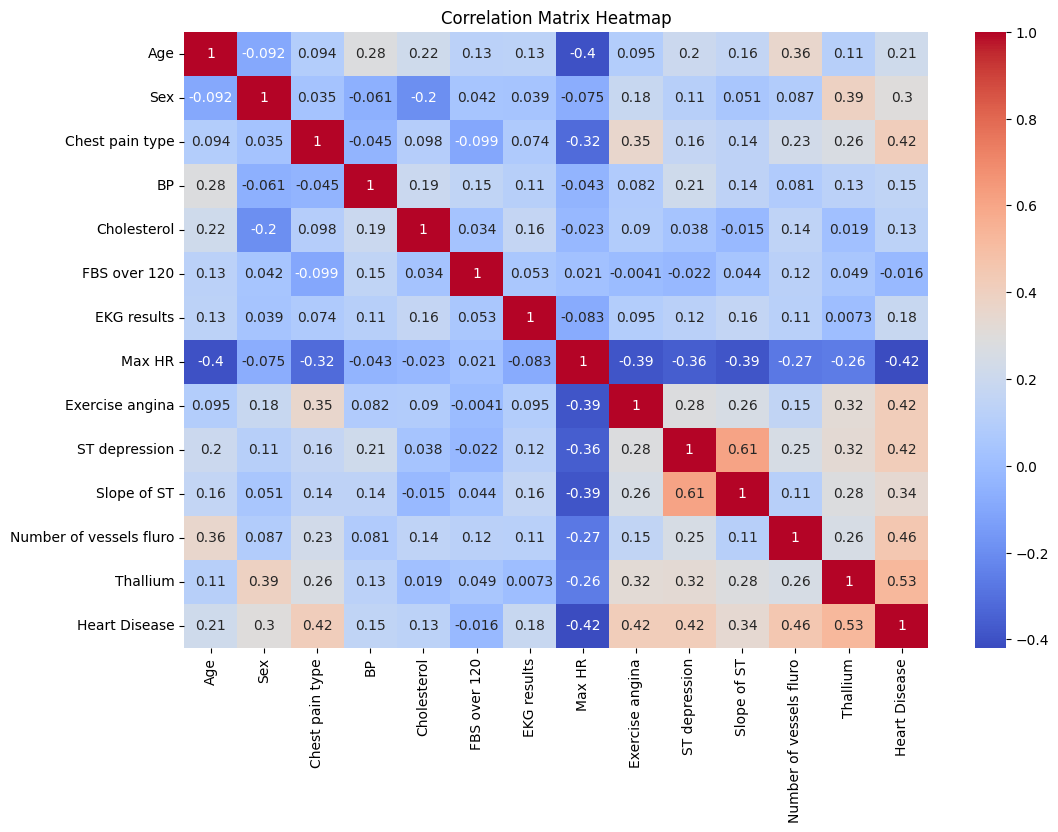

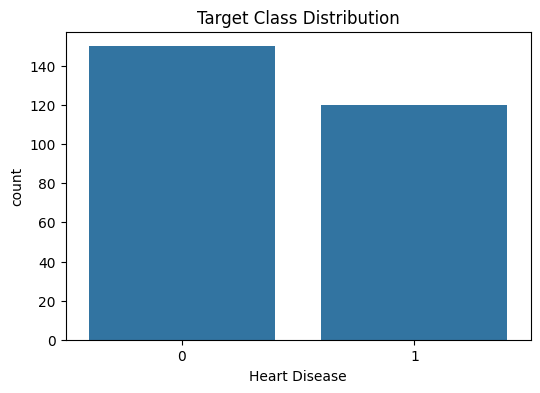

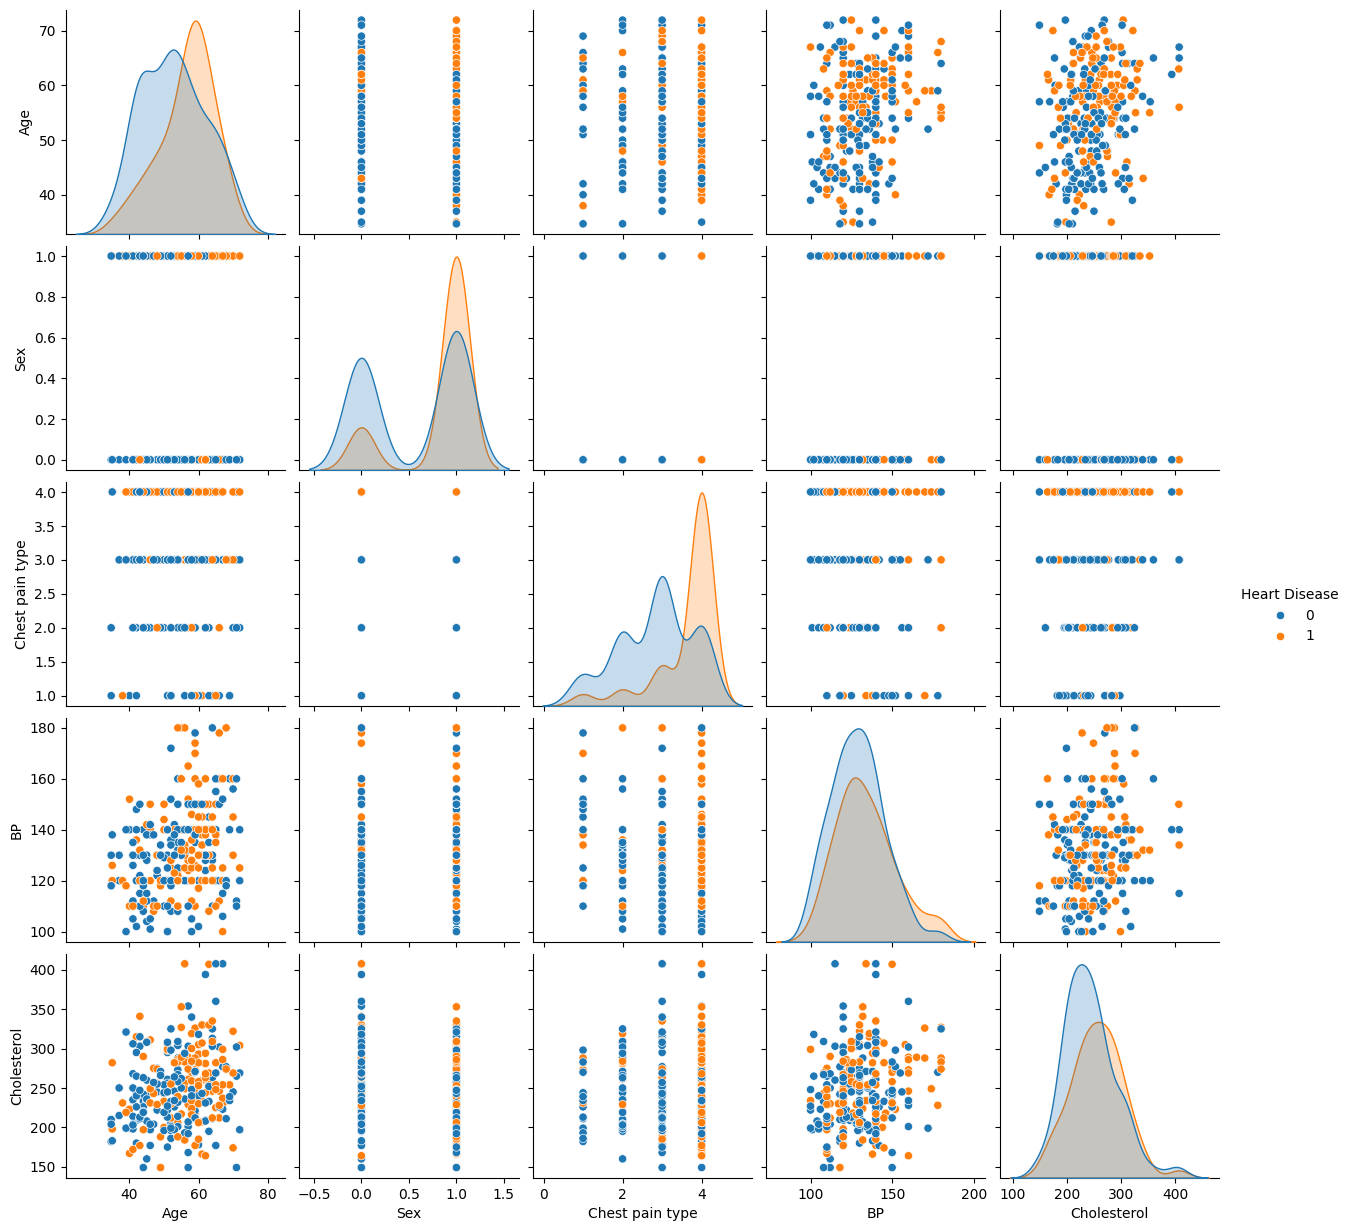

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms
data.hist(figsize=(12,10), bins=15)
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots
plt.figure(figsize=(12,8))
sns.boxplot(data=data[num_cols])
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Heart Disease', data=data)
plt.title("Target Class Distribution")
plt.show()

# Pairplot (first 5 columns)
sns.pairplot(data[num_cols.tolist()[:5] + ['Heart Disease']], hue='Heart Disease')
plt.show()

In [10]:
import numpy as np
for col in num_cols:
    lower = data[col].quantile(0.01)
    upper = data[col].quantile(0.99)
    data[col] = np.clip(data[col], lower, upper)

In [11]:
# Encode target variable
data['Heart Disease'] = data['Heart Disease'].apply(lambda x: 1 if x=='Presence' else 0)

# One-Hot encode other categorical features
if len(cat_cols) > 0:
    data = pd.get_dummies(data, columns=cat_cols)

In [13]:
from sklearn.preprocessing import StandardScaler
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

print("\n✅ Dataset split completed!")
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


✅ Dataset split completed!
Train shape: (188, 13) (188,)
Validation shape: (41, 13) (41,)
Test shape: (41, 13) (41,)


In [17]:
import joblib
import pandas as pd

train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['Heart Disease'] = y_train.values
train_df.to_csv('train.csv', index=False)

val_df = pd.DataFrame(X_val, columns=X.columns)
val_df['Heart Disease'] = y_val.values
val_df.to_csv('val.csv', index=False)

test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['Heart Disease'] = y_test.values
test_df.to_csv('test.csv', index=False)

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

print("\n✅ Processed data and scaler saved successfully!")


✅ Processed data and scaler saved successfully!
